# Ministery of Health Twitter Analysis

In [1]:
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time
import json
import re
!pip install unidecode
import unidecode
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 8.2 MB/s 


In [2]:
entity = 'min_health'
agency_twitter = 'minsaude'

In [3]:
# setup security 
access_token = '1006599768104144896-08Q8MuqehWAXLYxH4qfQPd3ihda2WW'
access_token_secret = 'hZGfKdUzY1t2jUrA5t2egNhoKTPCz457orKvFVVDD117G'
consumer_key = 'mVDo4ha0iWDHYXdalHH6g8tx7'
consumer_secret = 'A6vRmL8VmLwpncQD2at0PHkzBswjT7m70BWmpv0rMkxBbvIoan'

In [4]:
# setup file store
from google.colab import drive
drive.mount('/content/drive/')
path_drive = '/content/drive/My Drive/[UFU] Pesquisa/MobiSocial 2022/'
file = path_drive + entity + '/' + entity + '_tweets.json'
edges_file = path_drive + entity + '/' + entity + '_hashtags.csv'

Mounted at /content/drive/


# Getting tweets

In [ ]:
import tweepy #https://github.com/tweepy/tweepy
import csv

def get_all_tweets(screen_name, filew):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)

    alltweets = []

    new_tweets = api.user_timeline(screen_name = screen_name,count=200,tweet_mode='extended')

    for tweet in new_tweets:
        json_str = json.dumps(tweet._json)
        filew.write(json_str + '\n')
    
    alltweets.extend(new_tweets)

    oldest = alltweets[-1].id - 1

    while len(new_tweets) > 0:
        print ("getting tweets before %s" % (oldest))

        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest,tweet_mode='extended')

        for tweet in new_tweets:
            json_str = json.dumps(tweet._json)
            filew.write(json_str + '\n')
        
        alltweets.extend(new_tweets)

        oldest = alltweets[-1].id - 1

        print ("...%s tweets downloaded so far" % (len(alltweets)))
        
filew = open(file, 'w')
get_all_tweets(agency_twitter, filew)
filew.close()


getting tweets before 1491830417711943684
...400 tweets downloaded so far
getting tweets before 1479084737847308291
...600 tweets downloaded so far
getting tweets before 1471291385466658816
...800 tweets downloaded so far
getting tweets before 1466554716276461567
...1000 tweets downloaded so far
getting tweets before 1462888806437298179
...1200 tweets downloaded so far
getting tweets before 1453440015032373255
...1400 tweets downloaded so far
getting tweets before 1442863018707148801
...1600 tweets downloaded so far
getting tweets before 1431614804653977603
...1800 tweets downloaded so far
getting tweets before 1425565666694815753
...2000 tweets downloaded so far
getting tweets before 1420417805757865985
...2200 tweets downloaded so far
getting tweets before 1415756371555852287
...2400 tweets downloaded so far
getting tweets before 1410749235557928964
...2600 tweets downloaded so far
getting tweets before 1405510592241098754
...2800 tweets downloaded so far
getting tweets before 139968

## Hashtags network

In [ ]:
with open(file, 'r') as f:
    alltweets = f.readlines()

texts = []
for tweet_line in alltweets:   
    tweet = json.loads(tweet_line)
    texts.append(tweet['full_text'])

print(len(texts))

3250


In [ ]:
## get hashtags
def extract_hash_tags(s):
    return set(part[1:] for part in s.split() if part.startswith('#'))

def normalize_text(s):
    s = re.sub(r'[^\w\s]','',s)
    s = s.lower()
    s = unidecode.unidecode(s)
    return s

allhashtags = set()
hashtagsList = []
for i, text in enumerate(texts):
    wordList = extract_hash_tags(text)
    if wordList:
        hashtags = [normalize_text(w) for w in wordList]
        for w in hashtags:
            allhashtags.add(w)
        print(i, wordList, hashtags)
        hashtagsList.append(hashtags)

print('\n### Tamanho total do conjunto de hashtags:', len(allhashtags))
print('\n### Quantidade de listas de hashtags:', len(hashtagsList))

0 {'PátriaVacinada', 'BrasilUnido'} ['patriavacinada', 'brasilunido']
1 {'Covid19'} ['covid19']
8 {'SUS'} ['sus']
10 {'AoVivo'} ['aovivo']
15 {'SOUGOVBR'} ['sougovbr']
22 {'Covid19'} ['covid19']
36 {'SUS'} ['sus']
38 {'Covid19!'} ['covid19']
39 {'SAÚDENEWS'} ['saudenews']
41 {'Covid19.'} ['covid19']
47 {'SUS'} ['sus']
51 {'AoVivo'} ['aovivo']
53 {'URGENTE'} ['urgente']
59 {'Covid19', 'SAÚDENEWS'} ['covid19', 'saudenews']
60 {'SaúdeBrasil'} ['saudebrasil']
61 {'SUS.'} ['sus']
63 {'MSpeloBrasil'} ['mspelobrasil']
71 {'SAÚDENEWS'} ['saudenews']
72 {'SUS'} ['sus']
73 {'SAÚDENEWS'} ['saudenews']
76 {'SAÚDENEWS', 'SUS,'} ['saudenews', 'sus']
77 {'PátriaVacinada', 'BrasilUnido'} ['patriavacinada', 'brasilunido']
78 {'Covid19'} ['covid19']
80 {'Covid19:'} ['covid19']
81 {'SaúdeBrasil'} ['saudebrasil']
82 {'SUS'} ['sus']
86 {'Covid19.', 'SAÚDENEWS'} ['covid19', 'saudenews']
93 {'AoVivo:'} ['aovivo']
95 {'SUS'} ['sus']
96 {'SUS'} ['sus']
106 {'Covid19', 'SAÚDENEWS'} ['covid19', 'saudenews']
107 

In [ ]:
## normalizing hashtaghs
def normalize(hashtag):
    if hashtag == 'COVID19': return 'covid19'
    return hashtag
  

for hashtags in hashtagsList:
    for i in range(len(hashtags)):
        hashtags[i] = normalize(hashtags[i])

In [ ]:
## building the network
edges = {}
for hashtags in hashtagsList:
    for i in range(len(hashtags)):
        for j in range(i+1, len(hashtags)):
            key = hashtags[i] + '-' + hashtags[j]
            edge = (hashtags[i], hashtags[j], 1)
            if key in edges:
                (h1, h2, w) = edges[key]
                edge = (h1, h2, w+1)
                edges.update( {key : edge} )
            else:
                edges.update( {key : edge} )
            print(edge)

('patriavacinada', 'brasilunido', 1)
('covid19', 'saudenews', 1)
('saudenews', 'sus', 1)
('patriavacinada', 'brasilunido', 2)
('covid19', 'saudenews', 2)
('covid19', 'saudenews', 3)
('sus', 'somostodosraros', 1)
('somostodosraros', 'doencasraras', 1)
('somostodosraros', 'doencasraras', 2)
('aovivo', 'sus', 1)
('aovivo', 'saudebucal', 1)
('sus', 'saudebucal', 1)
('covid19', 'sus', 1)
('covid19', 'saudenews', 4)
('covid19', 'saudenews', 5)
('brasilunido', 'patriavacinada', 1)
('sus', 'aovivo', 1)
('covid19', 'aovivo', 1)
('aovivo', 'patriavacinada', 1)
('aovivo', 'covid19', 1)
('patriavacinada', 'covid19', 1)
('patriavacinada', 'covid19', 2)
('covid19', 'patriavacinada', 1)
('covid19', 'patriavacinada', 2)
('covid19', 'brasilunido', 1)
('patriavacinada', 'brasilunido', 3)
('sus', 'mspelobrasil', 1)
('covid19', 'mspelobrasil', 1)
('comidadeverdade', 'saudebrasil', 1)
('comidadeverdade', 'comidasaudavel', 1)
('comidadeverdade', 'cafedamanha', 1)
('comidadeverdade', 'alimentacaosaudavel', 1

In [ ]:
## generating edges file
filew = open(edges_file, 'w')
filew.write('Source,Target,weight\n')
print('Source,Target,weight')
for key, edge in edges.items():
    (h1,h2,w) = edge
    if h1 and h2:
        edgeLine = h1 + ',' + h2 + ',' + str(w)
        print(edgeLine)
        filew.write(edgeLine + '\n')
        
filew.close()    

Source,Target,weight
patriavacinada,brasilunido,107
covid19,saudenews,82
saudenews,sus,1
sus,somostodosraros,1
somostodosraros,doencasraras,2
aovivo,sus,1
aovivo,saudebucal,1
sus,saudebucal,1
covid19,sus,10
brasilunido,patriavacinada,38
sus,aovivo,3
covid19,aovivo,19
aovivo,patriavacinada,1
aovivo,covid19,2
patriavacinada,covid19,12
covid19,patriavacinada,103
covid19,brasilunido,51
sus,mspelobrasil,24
covid19,mspelobrasil,10
comidadeverdade,saudebrasil,1
comidadeverdade,comidasaudavel,1
comidadeverdade,cafedamanha,1
comidadeverdade,alimentacaosaudavel,1
saudebrasil,comidasaudavel,1
saudebrasil,cafedamanha,1
saudebrasil,alimentacaosaudavel,1
comidasaudavel,cafedamanha,1
comidasaudavel,alimentacaosaudavel,1
cafedamanha,alimentacaosaudavel,1
alimentacaoinfantil,saudebrasil,1
alimentacaoinfantil,acucar,1
saudebrasil,acucar,1
covid19,patria,2
covid19,balanco2021,2
avozdobrasil,retrospectiva,1
covax,vaccinequity,1
covax,covid19,1
vaccinequity,covid19,1
mspelobrasil,aovivo,3
covid19,breakingn

# Engagement analysis

In [5]:
with open(file, 'r') as f:
    alltweets = f.readlines()

texts = []
for tweet_line in alltweets:   
    tweet = json.loads(tweet_line)
    engaged = tweet['retweet_count'] + tweet['favorite_count'] + len(tweet['entities']['user_mentions'])
    texts.append([tweet['id_str'],tweet['created_at'],tweet['retweet_count'],tweet['favorite_count'],len(tweet['entities']['user_mentions']),tweet['is_quote_status'],engaged,tweet['full_text']])

columns = ['id','created_at','rt_count','fav_count','mentions_count','is_quote','engaged','text']
df = pd.DataFrame(texts, columns=columns)
total_tweets = len(df)
print('Total tweets: ', total_tweets)

df.head()

Total tweets:  3250


,id,created_at,rt_count,fav_count,mentions_count,is_quote,engaged,text
0,1509621653747089412,Thu Mar 31 20:00:24 +0000 2022,3,30,0,False,33,"E se você é um dos 58,1 MILHÕES que ainda não tomaram a dose de reforço, procure o posto mais próximo da sua casa. 🏥 Estudos mostram que ela aumenta em até 100 vezes a imunidade contra a doença. #BrasilUnido #PátriaVacinada 💚💙💛"
1,1509621651935215616,Thu Mar 31 20:00:23 +0000 2022,22,74,0,False,96,"Rio Grande do Norte, Piauí, Maranhão, Rondônia, Acre e Amapá não registraram novos óbitos por #Covid19 nas últimas 24 horas. A melhora no cenário epidemiológico se deve, principalmente, à campanha de vacinação que fez o imunizante chegar a 91,5% da população acima de 12 anos!"
2,1509558029271797760,Thu Mar 31 15:47:35 +0000 2022,0,0,1,False,1,@danipaimm O andamento da vacinação no país pode ser acompanhado pela plataforma Localiza SUS. Acesse: https://t.co/NpbdKpqVnL
3,1509284503725875203,Wed Mar 30 21:40:41 +0000 2022,0,1,1,False,2,"@__machadof Vamos juntos por um Brasil melhor, Fer! 😉💚"
4,1509284457059999747,Wed Mar 30 21:40:30 +0000 2022,0,0,1,False,1,"@osvaldolaini Quase todas as vacinas são periódicas. À medida que a resposta imunológica vai caindo, é necessária outra dose. Continue nos seguindo para mais informações. 😉😄"


In [6]:
## counting number of engaged tweets
def engaged_tweets(df):
    #return df[(df.rt_count > 0) | (df.fav_count > 0)].count()
    return df[(df.engaged > 0)].count()

def not_engaged_tweets(df):
    return df[(df.engaged == 0)].count()

def engaged_rt_tweets(df):
    return df[(df.rt_count > 0)].count()

def engaged_fav_tweets(df):
    return df[(df.fav_count > 0)].count()

def engaged_mention_tweets(df):
    return df[(df.mentions_count > 0)].count()

sum_engaged_tweets = engaged_tweets(df)
print('Engaged tweets: ', sum_engaged_tweets['rt_count'], sum_engaged_tweets['rt_count']*100/total_tweets)
sum_engaged_rt_tweets = engaged_rt_tweets(df)
print('Engaged rt tweets: ', sum_engaged_rt_tweets['rt_count'], sum_engaged_rt_tweets['rt_count']*100/sum_engaged_tweets['rt_count'])
sum_engaged_fav_tweets = engaged_fav_tweets(df)
print('Engaged fav tweets: ', sum_engaged_fav_tweets['fav_count'], sum_engaged_fav_tweets['fav_count']*100/sum_engaged_tweets['fav_count'])
sum_engaged_mention_tweets = engaged_mention_tweets(df)
print('Engaged mention tweets: ', sum_engaged_mention_tweets['mentions_count'], sum_engaged_mention_tweets['mentions_count']*100/sum_engaged_tweets['mentions_count'])
sum_not_engaged_tweets = not_engaged_tweets(df)
print('Not Engaged tweets: ', sum_not_engaged_tweets['rt_count'], sum_not_engaged_tweets['rt_count']*100/total_tweets)

Engaged tweets:  3237 99.6
Engaged rt tweets:  2455 75.84182885387705
Engaged fav tweets:  2740 84.64627741736176
Engaged mention tweets:  1230 37.99814643188137
Not Engaged tweets:  13 0.4


In [7]:
## getting most engaged tweets

df = df.sort_values(by=['engaged'],ascending=False)
df.head(10)

,id,created_at,rt_count,fav_count,mentions_count,is_quote,engaged,text
2330,1413209550296174592,Thu Jul 08 18:53:07 +0000 2021,2428,16843,0,False,19271,"Se você já tomou a 1ª dose da vacina da Covid-19, não deixe de receber a 2ª para ficar mais protegido. Os cuidados continuam: use máscara, lave as mãos com água e sabão, mantenha distância segura e ambientes ventilados. Assim, você protege a sua família, a sua renda e o Brasil 🇧🇷 https://t.co/8DyesWDF7g"
1976,1420767735349383170,Thu Jul 29 15:26:39 +0000 2021,1734,15819,0,False,17553,"👉 Proteger a amamentação é responsabilidade de todos. A amamentação é recomendada até os 2 anos ou mais e, de forma exclusiva, nos primeiros 6 meses de vida da criança. Saiba mais em https://t.co/Ct4v67Fsaa #TodosPelaAmamentação https://t.co/T6ttP051GW"
2907,1395726227156004866,Fri May 21 13:00:38 +0000 2021,2135,13463,0,False,15598,"Quando chegar em casa, abra as janelas e deixe os ambientes o mais ventilado possível! Além disso, lembre-se de usar máscara, lavar as mãos com água e sabão e manter distância segura das outras pessoas. O cuidado é de cada um. O benefício é para todos. \n\n#PátriaVacinada https://t.co/ZNF9xIll34"
2629,1404512102706868225,Mon Jun 14 18:52:34 +0000 2021,1955,13274,0,False,15229,"Nosso agradecimento a todos os doadores de sangue que ajudam a salvar a vida de milhares de brasileiros. E, se você ainda não é doador, faça parte dessa corrente pela vida! Informe-se no hemocentro mais próximo. Saiba mais em https://t.co/Ct4v67X31I #doesangue https://t.co/4vnmleEBoi"
2630,1404477110182416394,Mon Jun 14 16:33:31 +0000 2021,1706,12530,0,False,14236,"Tem sempre alguém precisando da sua doação de sangue e, juntos, com a nossa união, a vida se completa. Todas as unidades estão preparadas para receber os doadores em segurança durante a pandemia. \n\n➡️Saiba mais em https://t.co/Ct4v67Fsaa #doesangue https://t.co/HK9fyCOVbr"
2917,1395409001815314437,Thu May 20 16:00:06 +0000 2021,1926,12235,0,False,14161,"Para diminuir as chances de contágio da Covid-19, use máscara, lave sempre as mãos com água e sabão, mantenha uma distância segura das outras pessoas e deixe sempre os ambientes ventilados. Contra a Covid-19, o cuidado é de cada um. O benefício é para todos. #PátriaVacinada https://t.co/ujjYDkvFCP"
2692,1402596811915808771,Wed Jun 09 12:01:53 +0000 2021,1198,10035,0,False,11233,"Começou a terceira etapa de vacinação contra a gripe. Se você faz parte dos públicos prioritários, procure um posto de saúde e leve a caderneta ou documento com foto. Saiba mais em https://t.co/Ct4v67Fsaa #VacinaGripe https://t.co/ryBTSisBfo"
2643,1404142209637634050,Sun Jun 13 18:22:45 +0000 2021,1569,9645,0,False,11214,"Fique atento ao calendário de vacinação na sua cidade e, se for sua vez, vacine já e não se esqueça de tomar a 2ª dose. Brasil Unido. #PátriaVacinada https://t.co/uZDhZia8l4"
2344,1412888476052332544,Wed Jul 07 21:37:17 +0000 2021,1222,9787,1,False,11010,"O @minsaude lançou hoje a nova campanha da Família Zé Gotinha para chamar a atenção das pessoas que tomaram a primeira dose da vacina Covid-19, mas não voltaram para receber a segunda. Se você é uma delas, vá a um posto de vacinação, complete a sua imunização e proteja-se já! https://t.co/Ly6IWduXbS"
2682,1403121655921184769,Thu Jun 10 22:47:26 +0000 2021,1519,9487,0,False,11006,"#URGENTE 💉💉💉💉\n\nO ministro da Saúde, Marcelo Queiroga, afirmou há pouco que recebeu o pedido do presidente da República, Jair Bolsonaro, para produzir um estudo que trate da flexibilização do uso de máscaras, conforme o avanço da vacinação no país. https://t.co/XIvJew7y5E"


In [8]:
## getting collect period
pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y").sort_values()

3249   2021-04-16 13:43:03
3248   2021-04-16 16:01:42
3247   2021-04-16 18:24:26
3246   2021-04-16 22:57:21
3245   2021-04-16 23:52:05
               ...        
4      2022-03-30 21:40:30
3      2022-03-30 21:40:41
2      2022-03-31 15:47:35
1      2022-03-31 20:00:23
0      2022-03-31 20:00:24
Name: created_at, Length: 3250, dtype: datetime64[ns]

In [9]:
## most mentioned users
with open(file, 'r') as f:
    alltweets = f.readlines()

mentions = {}
for tweet_line in alltweets:   
    tweet = json.loads(tweet_line)
    user_mentions = tweet['entities']['user_mentions']
    for user in user_mentions:
        key = user['screen_name']
        if key in mentions:
            count = mentions[key]
            mentions.update( {key : count+1} )
        else:
            mentions.update( {key : 1} )
        
for w in sorted(mentions, key=mentions.get, reverse=True):
    print(w, mentions[w])


minsaude 288
govbr 54
fiocruz 19
tvbrasilgov 16
MariaBo67552649 15
mqueiroga2 13
Rodrigo28260226 11
BragaMarianetti 9
srbmello 8
Sir_Baumgarten 7
mariac_fl 7
OPASOMSBrasil 7
Marina650302531 7
marcelo_ctt 6
AlineJacob8 6
Luciola68148379 6
casacivilbr 6
CelioMarquesGa1 5
PauloRBarbosa6 5
edsonbjl 5
MouraFernandez 5
eugenioepsp 5
Carolmph 5
valtersalgado 5
LucenirRodrigu8 5
_phooliveira 5
avozdobrasil 5
butantanoficial 5
WHO 4
AnnaSev15363673 4
secomvc 4
kbarbosilva 4
ItamaratyGovBr 4
yadrieldiaz 4
SteRibas 4
OliAntonia 4
ViviValado 4
ElijaneC 4
KnuclesMestre 4
Elaine86835408 4
MinCidadania 4
ufmg 4
flanatica81 3
aprofgabriella 3
mkmilagre 3
bras_data 3
anvisa_oficial 3
furtado9 3
PauloCe94986260 3
brunogerolin 3
MochettiAntonio 3
JoviJoy2018CH 3
AdolphoCorrea 3
lacumbuca 3
Karina41036308 3
romuloleli 3
FeCastanhari 3
NyviEstephan 3
olintosantoscar 3
GuerreiroPatr10 3
nilobento 3
AndreaMito20222 3
Woiciek1 3
Susmr 3
Roseli98804808 3
William36735402 3
DanielM69362641 3
DilkaMaria 3
DefesaG

# Temporal Analysis

In [10]:
total = len(df)
print('Total number of tweets: ', total)

Total number of tweets:  3250


Text(0.5, 1.0, 'min_health tweets distribution per month')

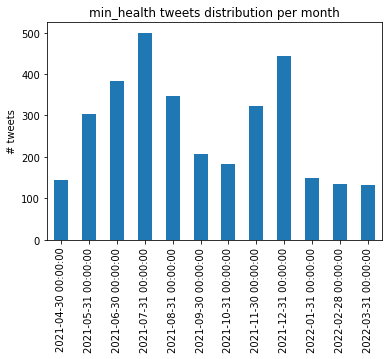

In [11]:
## temporal analysis
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="M"))
g['id'].count().plot(kind="bar")
plt.ylabel('# tweets')
plt.xlabel('')
plt.title(entity + ' tweets distribution per month')

Text(0.5, 1.0, 'min_health tweets distribution per week')

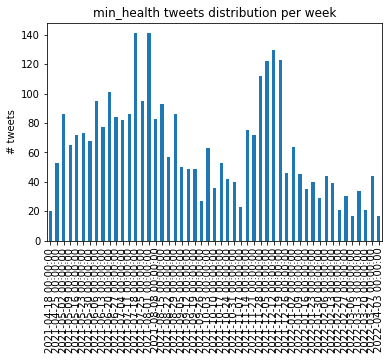

In [12]:
## temporal analysis
import numpy
%matplotlib inline

df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="W"))
g['id'].count().plot(kind="bar")
plt.ylabel('# tweets')
plt.xlabel('')
plt.title(entity + ' tweets distribution per week')

Text(0.5, 1.0, 'min_health number of tweets per day')

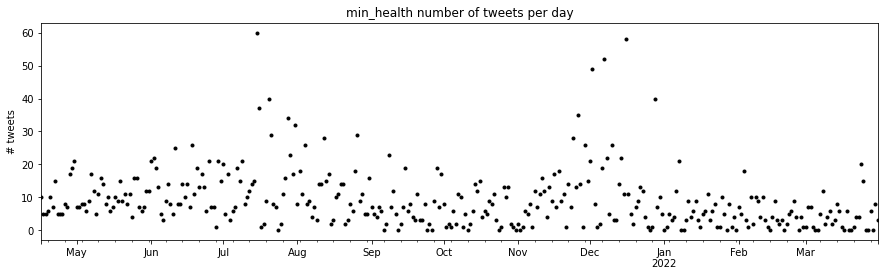

In [13]:
## temporal analysis
import numpy
%matplotlib inline
plt.figure(figsize=(15,4))
df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="D"))
g['id'].count().plot(style="k.")
plt.ylabel('# tweets')
plt.xlabel('')
plt.title(entity + ' number of tweets per day')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Figure size 1080x288 with 0 Axes>

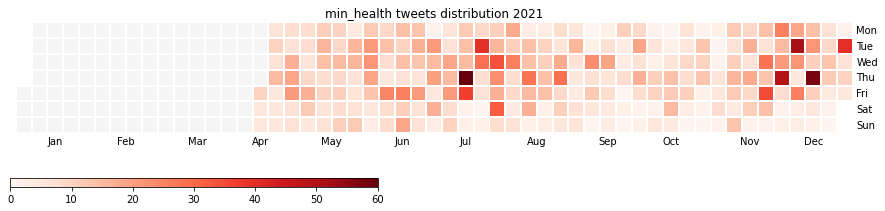

In [14]:
## temporal analysis
import numpy
!pip install calmap
import calmap
%matplotlib inline
plt.figure(figsize=(15,4))
df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="D"))
quantities = g['id'].count()

year = 2021
fig = plt.figure(figsize=(15,6))
plt.title(entity + ' tweets distribution ' + str(year))
#ax = fig.add_subplot(111)
cax = calmap.yearplot(quantities, year=year)
#fig.colorbar(cax.get_children()[1], ax=cax, orientation='vertical', aspect=2)

cbar_ax = fig.add_axes([0.12, 0.25, 0.34, 0.02])
fig.colorbar(cax.get_children()[1], cax=cbar_ax, orientation="horizontal")

<Figure size 1080x288 with 0 Axes>

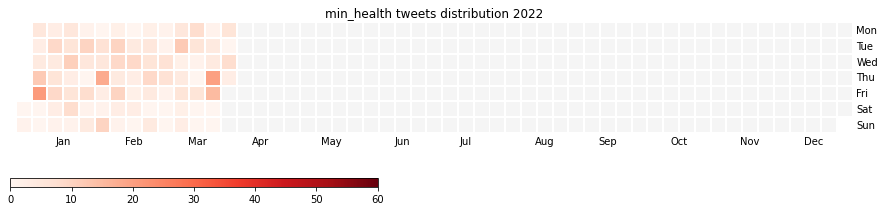

In [15]:
## temporal analysis
import numpy
#!pip install calmap
import calmap
%matplotlib inline
plt.figure(figsize=(15,4))
df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="D"))
quantities = g['id'].count()

year = 2022
fig = plt.figure(figsize=(15,6))
plt.title(entity + ' tweets distribution ' + str(year))
#ax = fig.add_subplot(111)
cax = calmap.yearplot(quantities, year=year)
#fig.colorbar(cax.get_children()[1], ax=cax, orientation='vertical', aspect=2)

cbar_ax = fig.add_axes([0.12, 0.25, 0.34, 0.02])
fig.colorbar(cax.get_children()[1], cax=cbar_ax, orientation="horizontal")

Text(0.5, 1.0, 'min_health tweets distribution per hour')

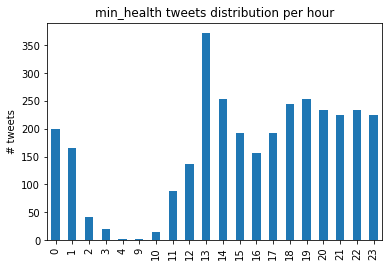

In [16]:
df.groupby(df['date'].dt.hour)['id'].count().plot(kind="bar")
plt.ylabel('# tweets')
plt.xlabel('')
plt.title(entity + ' tweets distribution per hour')

# Trending analysis

In [17]:
import datetime
baseline_str = '2021-04-16'
baseline_date = datetime.datetime.strptime(baseline_str, '%Y-%m-%d')
baseline_date = baseline_date.date()
df['just_date'] = df['date'].apply(datetime.datetime.date)
baseline = df[df['just_date'] == baseline_date]
baseline_count = 0
if len(baseline) > 0:
    baseline_count = baseline.groupby('just_date').count()['id'][0]
print(baseline_count)

10


In [18]:
import math

def change_function(count):
    if math.isnan(count):
        count = 0
    if count == baseline_count:
        return 0
    change = 100*(count-baseline_count)/baseline_count
    return change

df_grouped = df.groupby('just_date', as_index=False).count()
df_grouped['change'] = df_grouped['date'].apply(change_function)
df_grouped.head(5)

,just_date,id,created_at,rt_count,fav_count,mentions_count,is_quote,engaged,text,date,change
0,2021-04-16,10,10,10,10,10,10,10,10,10,0.0
1,2021-04-17,5,5,5,5,5,5,5,5,5,-50.0
2,2021-04-18,5,5,5,5,5,5,5,5,5,-50.0
3,2021-04-19,6,6,6,6,6,6,6,6,6,-40.0
4,2021-04-20,10,10,10,10,10,10,10,10,10,0.0


In [19]:
import datetime as dt
# generate pandas with reference_date from 2021-04-16 to 2022-02-01
start = datetime.datetime.strptime("16-04-2021", "%d-%m-%Y")
end = datetime.datetime.strptime("01-02-2022", "%d-%m-%Y")
date_generated = [start + dt.timedelta(days=x) for x in range(0, (end-start).days)]

agencies_df = pd.DataFrame()
agencies_df['date_created'] = date_generated
agencies_df['date_created'] = agencies_df['date_created'].map(lambda x: x.date())
print(len(agencies_df))
agencies_df.head()

291


,date_created
0,2021-04-16
1,2021-04-17
2,2021-04-18
3,2021-04-19
4,2021-04-20


In [20]:
agencies_df = pd.merge(agencies_df, df_grouped, how='left', left_on='date_created', right_on='just_date')
agencies_df['change'] = agencies_df['date'].apply(change_function)
agencies_df = agencies_df.sort_values(by='date_created')
agencies_df['order'] = range(1, 1+len(agencies_df))
agencies_df.head()

,date_created,just_date,id,created_at,rt_count,fav_count,mentions_count,is_quote,engaged,text,date,change,order
0,2021-04-16,2021-04-16,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1
1,2021-04-17,2021-04-17,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,-50.0,2
2,2021-04-18,2021-04-18,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,-50.0,3
3,2021-04-19,2021-04-19,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,-40.0,4
4,2021-04-20,2021-04-20,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,5


In [21]:
agencies_df.tail(42)

,date_created,just_date,id,created_at,rt_count,fav_count,mentions_count,is_quote,engaged,text,date,change,order
249,2021-12-21,2021-12-21,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,-10.0,250
250,2021-12-22,2021-12-22,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,30.0,251
251,2021-12-23,2021-12-23,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,20.0,252
252,2021-12-24,2021-12-24,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,-60.0,253
253,2021-12-25,2021-12-25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-90.0,254
254,2021-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,255
255,2021-12-27,2021-12-27,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-90.0,256
256,2021-12-28,2021-12-28,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,300.0,257
257,2021-12-29,2021-12-29,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,-30.0,258
258,2021-12-30,2021-12-30,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,259


<Figure size 1080x720 with 0 Axes>

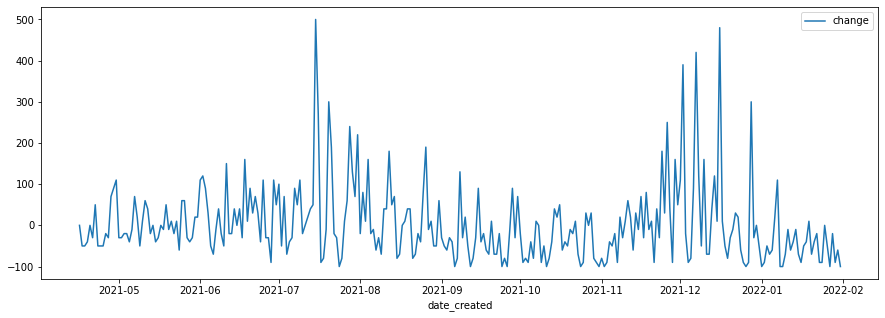

In [22]:
plt.figure(figsize=(15,10))
agencies_df.plot(kind='line', x='date_created', y='change',figsize=(15, 5))
plt.show()

In [27]:
#mark_firstcase = agencies_df[agencies_df['date_created']==datetime.date(2020,2,26)]['order'].to_list()[0]
#mark_firstmh = agencies_df[agencies_df['date_created']==datetime.date(2020,4,16)]['order'].to_list()[0]
#mark_secondmh = agencies_df[agencies_df['date_created']==datetime.date(2020,5,15)]['order'].to_list()[0]
#mark_thirdmh = agencies_df[agencies_df['date_created']==datetime.date(2020,6,2)]['order'].to_list()[0]

#mark_firstvaccine = agencies_df[agencies_df['date_created']==datetime.date(2020,12,2)]['order'].to_list()[0]
#mark_gamma = agencies_df[agencies_df['date_created']==datetime.date(2021,1,6)]['order'].to_list()[0]

#mark_brazilvaccine = agencies_df[agencies_df['date_created']==datetime.date(2021,1,17)]['order'].to_list()[0]
#mark_fourthmh = agencies_df[agencies_df['date_created']==datetime.date(2021,3,23)]['order'].to_list()[0]
#mark_deadliest = agencies_df[agencies_df['date_created']==datetime.date(2021,3,29)]['order'].to_list()[0]
mark_cpi = agencies_df[agencies_df['date_created']==datetime.date(2021,4,27)]['order'].to_list()[0]
mark_omicron = agencies_df[agencies_df['date_created']==datetime.date(2021,11,26)]['order'].to_list()[0]
mark_topcases = agencies_df[agencies_df['date_created']==datetime.date(2022,1,27)]['order'].to_list()[0]

list_marks = [#mark_firstcase, mark_firstmh, mark_secondmh, mark_thirdmh, mark_firstvaccine, mark_gamma,
              #mark_brazilvaccine, mark_fourthmh, mark_deadliest, 
              mark_cpi, mark_omicron, mark_topcases]
list_labels = [#'1stBraCase', '1stMH', '2ndMH', '3rdMH', '1stVac', 
               #'GAMMA', '1stBraVac', '4thMH', 'BraDeadliest', 
               'PCI', 'Omicron','BraTopCases']
list_marks

[12, 225, 287]

[-50.   0.  50. 100. 150. 200. 250. 300. 350.]
<a list of 9 Text major ticklabel objects>


Text(0.5, -0.2, 'Ministry of Health')

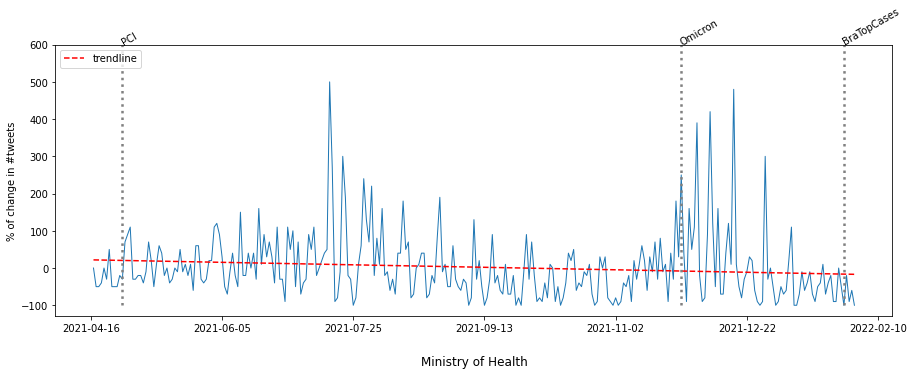

In [28]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def adjust_xticks(value):
    if value < 0:
      return ''
    start_date = agencies_df[agencies_df['order']==1]['date_created'][0]
    end_date = start_date + datetime.timedelta(days=value)
    label = str(end_date)
    return label

fig, ax = plt.subplots(figsize=(15,5))

# changes
x = agencies_df['order'].to_numpy()
y = agencies_df['change'].to_numpy()
x_new = np.linspace(x.min(), x.max(),291)
f = interp1d(x, y, kind='quadratic')
y_smooth=f(x_new)
ax.plot (x_new,y_smooth, linewidth=1.0)
ax.set_ylim(top=max(y_smooth)+100)
ax.set_ylabel('% of change in #tweets')

locs, labels = plt.xticks()
print(locs)
print(labels)
ax.set_xticklabels(np.array(list(map(adjust_xticks, locs))))

# baseline
##x_baseline = x
##y_baseline = [0]*len(x)
##line2 = ax.plot(x_baseline, y_baseline, '--', linewidth=0.5,
##                 label='baseline')

# trendline
z = np.polyfit(x.flatten(), y.flatten(), 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", linewidth=1.5, label='trendline')

# marklines
lines = []
reference = 600
for i, mark in enumerate(list_marks):
  x_covidline = [mark]*700
  y_covidline = [i for i in range(-100,reference)]
  #x_covidline = [mark]*len(y_smooth)
  #y_covidline = y_smooth
  line = ax.plot(x_covidline, y_covidline, linestyle=':', linewidth=2.5,
                 #label=list_labels[i], 
                 color='gray')
  
  if i in [3, 6, 8]:
    position_x = mark+4
    position_y = reference-0
  else:
    position_x = mark-1
    position_y = reference-0
  ax.annotate(list_labels[i], 
             (position_x, position_y), 
             color='black', rotation=30,
             size=10)
  
  lines.append(line)


ax.legend(loc='upper left',# bbox_to_anchor=(0.5, 1.15),
          ncol=1, fancybox=True)
plt.title('Ministry of Health', y=-0.2)